### Ejercicio 09 y 10
#### Jose Daniel Gomez Cabrera 214129

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sb
from sklearn.compose import make_column_selector as selector
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

#### Leer y describir los datos

In [36]:
houses = pd.read_csv('train.csv', encoding='latin1')
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Formatear y agrupar datos para poder hacer el arbol de clasificacion

In [84]:
# Definir las categorias de precios
categories = ['Economic', 'Intermediate', 'Expensive']

houses['PriceCategory'] = pd.qcut(houses['SalePrice'], q=len(categories), labels=categories)
houses['PriceCategory'] = houses['PriceCategory'].astype('category')
y = houses.pop('PriceCategory')
X = houses

#### Agrupar por categoria para poder visualizar la distribucion

In [85]:
categories = ['Economic', 'Intermediate', 'Expensive']

houses['PriceCategory'] = pd.qcut(houses['SalePrice'], q=len(categories), labels=categories)
houses['PriceCategory'] = houses['PriceCategory'].astype('category')
houses.groupby('PriceCategory').size()

PriceCategory
Economic        487
Intermediate    490
Expensive       483
dtype: int64

#### Crear arbol de clasificacion

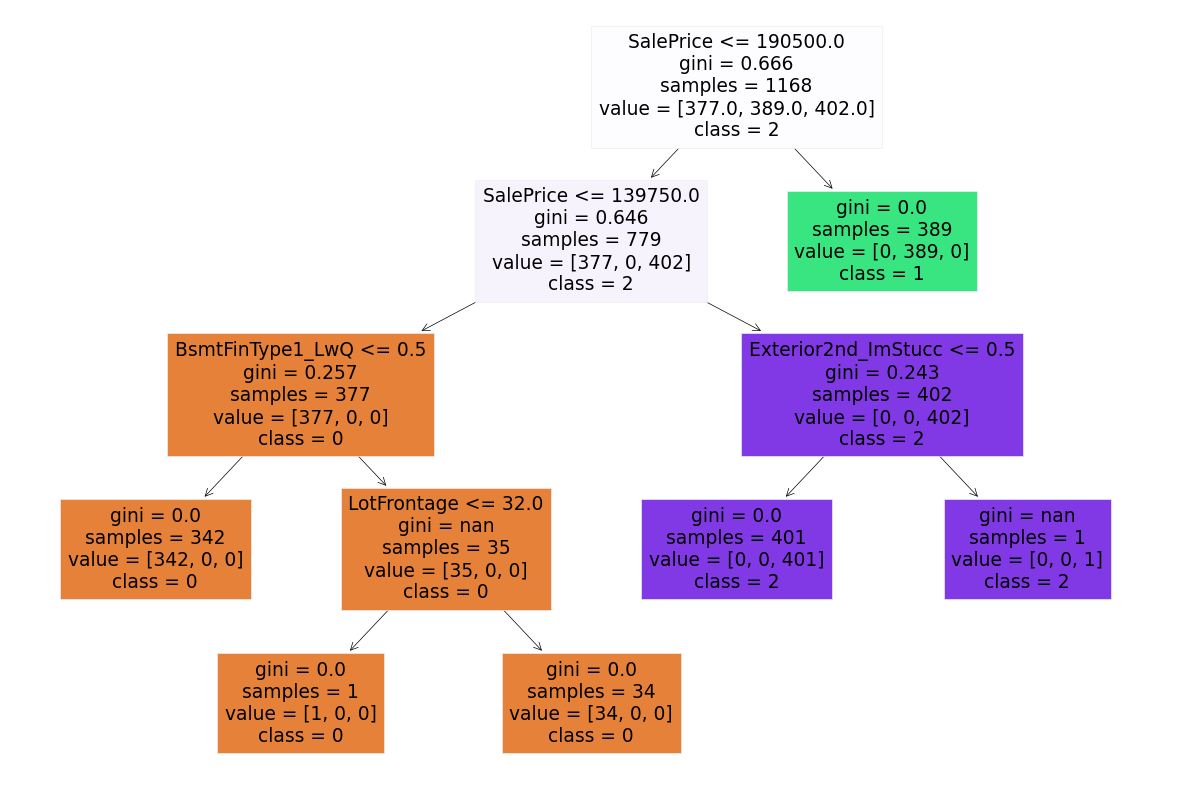

In [38]:
# Convertir las variables categóricas a forma numerica
X_dummy = pd.get_dummies(X)

# Dividir tus datos y entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2,  random_state=42)

# Instanciar el arbol y su profundidad
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
# Entrenar arbol de acuerdo a los datos de entrenamiento
clf.fit(X_train, y_train)

# Graficar arbol de clasificacion
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X_dummy.columns, class_names=['0','1','2'], filled=True)
plt.show()

Confussion matrix: 
[[110   0   0]
 [  0  94   0]
 [  0   0  88]]

Accuracy: 1.0
Precision: [1. 1. 1.]
Recall: [1. 1. 1.]
F1 score: [1. 1. 1.]


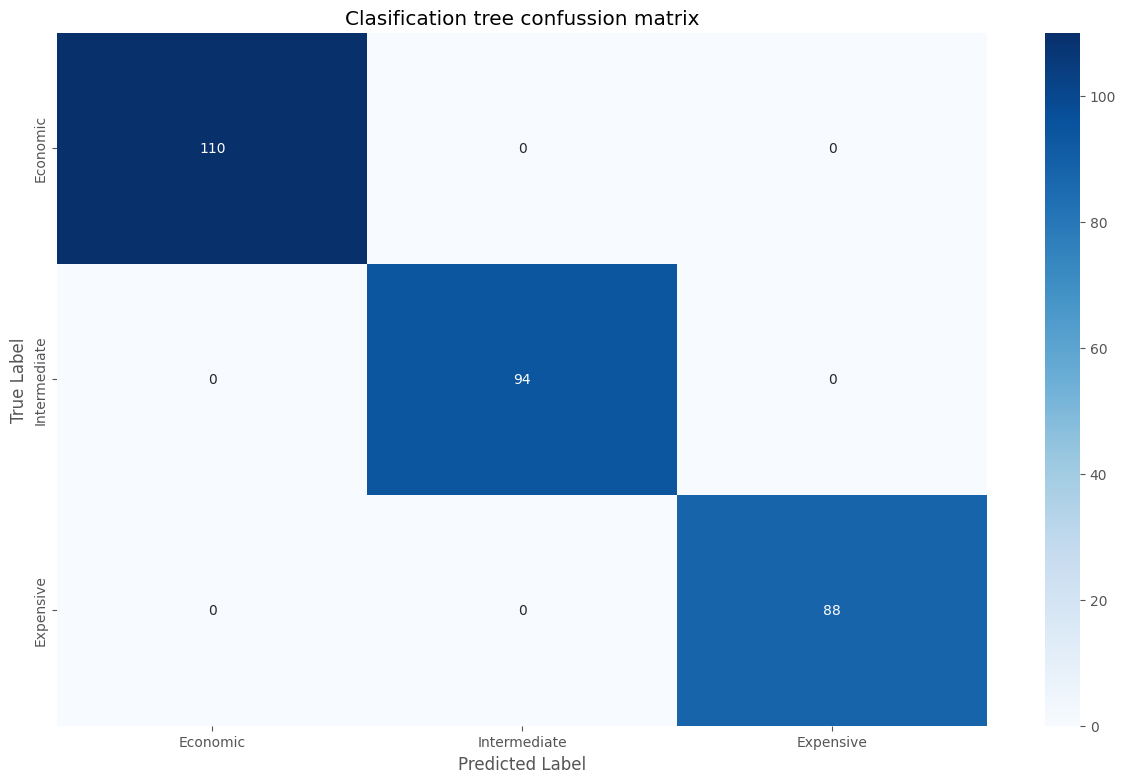

In [50]:
# Predecir etiquetas para los datos de prueba
y_pred = clf.predict(X_test)

# Instanciar matriz de confusión
confussionMatrix = confusion_matrix(y_test, y_pred)

# Calcular metricas de evaluacion de la matriz de confusion
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Mostrar resultados
print(f"Confussion matrix: \n{confussionMatrix}\n")
print(f"Accuracy: {format(accuracy)}")
print(f"Precision: {format(precision)}")
print(f"Recall: {format(recall)}")
print(f"F1 score: {format(f1)}")

# Visualizar la matriz de confusión
sb.heatmap(
  confussionMatrix,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['Economic', 'Intermediate', 'Expensive'],
  yticklabels=['Economic', 'Intermediate', 'Expensive']
)
plt.title('Clasification tree confussion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Validacion cruzada

In [96]:
random.seed(123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses)
categorical_columns = categorical_columns_selector(houses)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns)])

param_grid = {"max_depth": np.arange(2, 10, 1)}
pipeline = Pipeline(
    [('preprocessor',preprocessor),
    ('regressor',DecisionTreeClassifier())])
params = [{
    "regressor__max_depth": np.arange(2, 10, 1)
}]
crossoverModel = GridSearchCV(pipeline, param_grid=params, n_jobs=2, cv=5,scoring="neg_root_mean_squared_error")
crossoverModel.fit(X_train,y_train)
crossoverModel.best_params_

crossoverModel_pred = crossoverModel.predict(X_test)
print("Crossover model")

# crossoverModel_pred
for i in range(0, len(crossoverModel_pred)):
    print(f"Predicted: {crossoverModel_pred[i]}, Real: {y_test.iloc[i]}")

Crossover model
Predicted: Economic, Real: Intermediate
Predicted: Expensive, Real: Expensive
Predicted: Intermediate, Real: Economic
Predicted: Intermediate, Real: Intermediate
Predicted: Expensive, Real: Expensive
Predicted: Economic, Real: Economic
Predicted: Expensive, Real: Expensive
Predicted: Intermediate, Real: Intermediate
Predicted: Economic, Real: Economic
Predicted: Economic, Real: Economic
Predicted: Intermediate, Real: Intermediate
Predicted: Economic, Real: Economic
Predicted: Expensive, Real: Economic
Predicted: Expensive, Real: Expensive
Predicted: Intermediate, Real: Intermediate
Predicted: Economic, Real: Economic
Predicted: Expensive, Real: Intermediate
Predicted: Economic, Real: Economic
Predicted: Intermediate, Real: Economic
Predicted: Expensive, Real: Expensive
Predicted: Intermediate, Real: Intermediate
Predicted: Expensive, Real: Expensive
Predicted: Expensive, Real: Intermediate
Predicted: Economic, Real: Economic
Predicted: Expensive, Real: Expensive
Predict

C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
